In [1]:
import cv2
import numpy as np

from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt

#### Basic image file loading and display

The size of the input image is:  (827, 900)


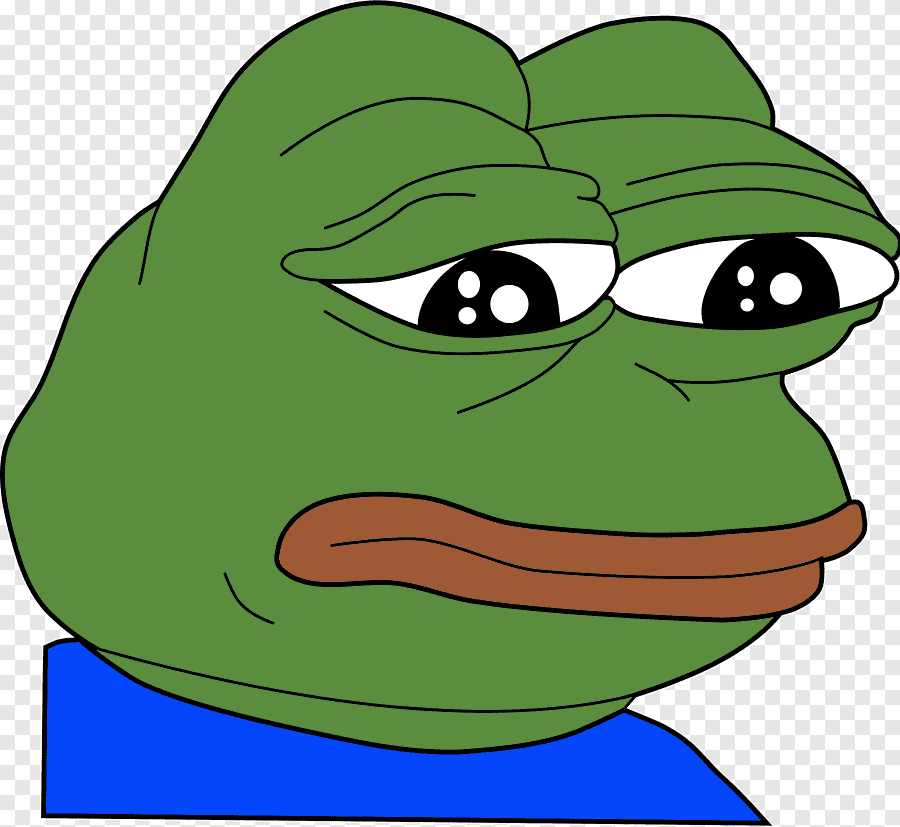

In [5]:
# read a file using PIL (pillow)
img = Image.open("pepe.png")

# convert to numpy array
img_np = np.array(img, dtype=np.uint8)
print("The size of the input image is: ", img_np.shape)

# display in-place image
display(img)

#### RGB to grayscale conversion

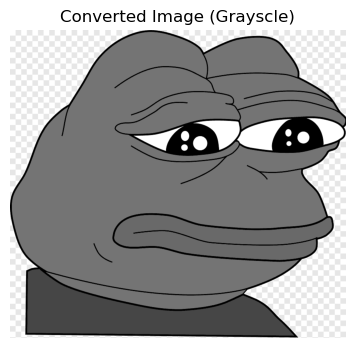

In [7]:
# convert to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# # display in-place image
plt.figure(figsize=(5, 4))
plt.imshow(img_gray, cmap="gray")
plt.title("Converted Image (Grayscle)")
plt.axis('off')
plt.show()

#### Add Gaussian and Poinsson noise to the grayscale image

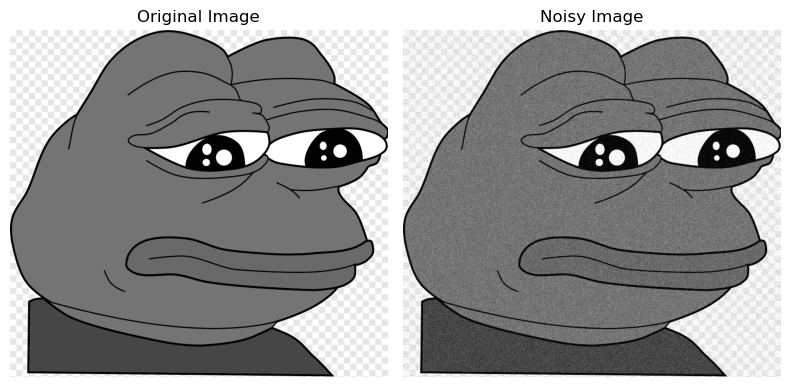

In [8]:
# add Poisson noise
poisson_noisy_img = np.random.poisson(img_gray).astype(np.float32)
if poisson_noisy_img.max() > 0:
    poisson_noisy_img = (poisson_noisy_img / poisson_noisy_img.max()) * 255
poisson_noisy_img = poisson_noisy_img.astype(np.uint8)

# add Gaussian noise
mean, std = 0, 20
gaussian_noise = np.random.normal(mean, std, img_gray.shape).astype(np.float32)
gaussian_noisy_img = img_gray.astype(np.float32) + gaussian_noise
gaussian_noisy_img = np.clip(gaussian_noisy_img, 0, 255).astype(np.uint8)

# create subplots to display the images
plt.figure(figsize=(8, 4))

# display the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# display the noisy grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gaussian_noisy_img, cmap="gray")
plt.title("Noisy Image")
plt.axis('off')

# show the plots
plt.tight_layout()
plt.show()

#### Apply Gaussian denoising, bilateral filtering, and patch-based denoising

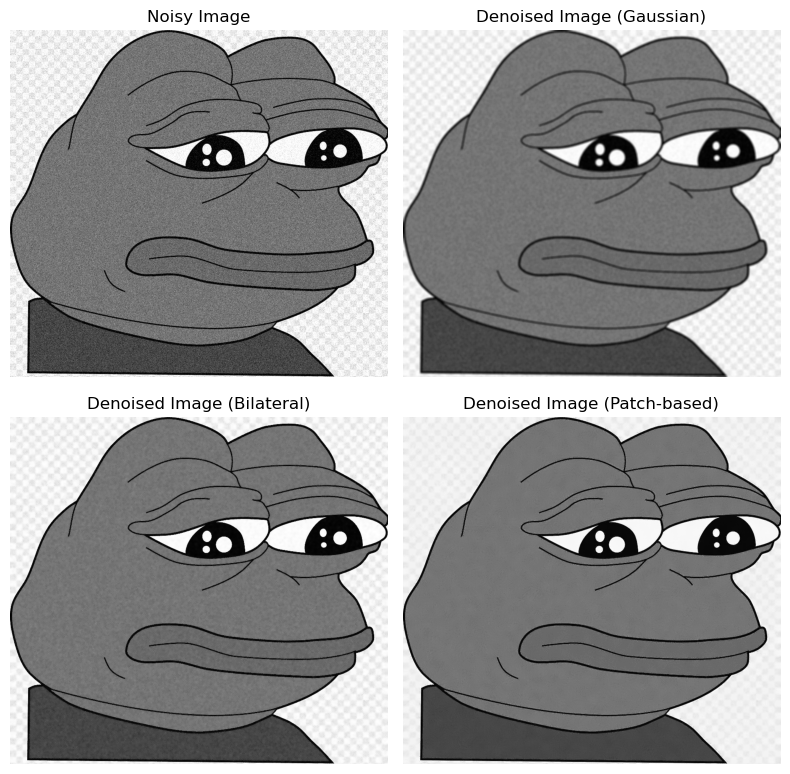

In [12]:
# apply Gaussian filtering
gaussian_denoised = cv2.GaussianBlur(gaussian_noisy_img, (7, 7), 3)

# apply bilateral filtering
bilateral_denoised = cv2.bilateralFilter(gaussian_noisy_img, d=9, sigmaColor=35, sigmaSpace=35)

# apply non-local means filtering
non_local_means_denoised = cv2.fastNlMeansDenoising(gaussian_noisy_img, None, h=15)

# create subplots to display the images
plt.figure(figsize=(8, 8))

# display the noisy grayscale image
plt.subplot(2, 2, 1)
plt.imshow(gaussian_noisy_img, cmap="gray")
plt.title("Noisy Image")
plt.axis('off')

# display the denoised image by Gaussian filtering
plt.subplot(2, 2, 2)
plt.imshow(gaussian_denoised, cmap="gray")
plt.title("Denoised Image (Gaussian)")
plt.axis('off')

# display the denoised image by bilateral filtering
plt.subplot(2, 2, 3)
plt.imshow(bilateral_denoised, cmap="gray")
plt.title("Denoised Image (Bilateral)")
plt.axis('off')

# display the denoised image by patch-based filtering
plt.subplot(2, 2, 4)
plt.imshow(non_local_means_denoised, cmap="gray")
plt.title("Denoised Image (Patch-based)")
plt.axis('off')

# show the plots
plt.tight_layout()
plt.show()

#### Apply histogram equalization

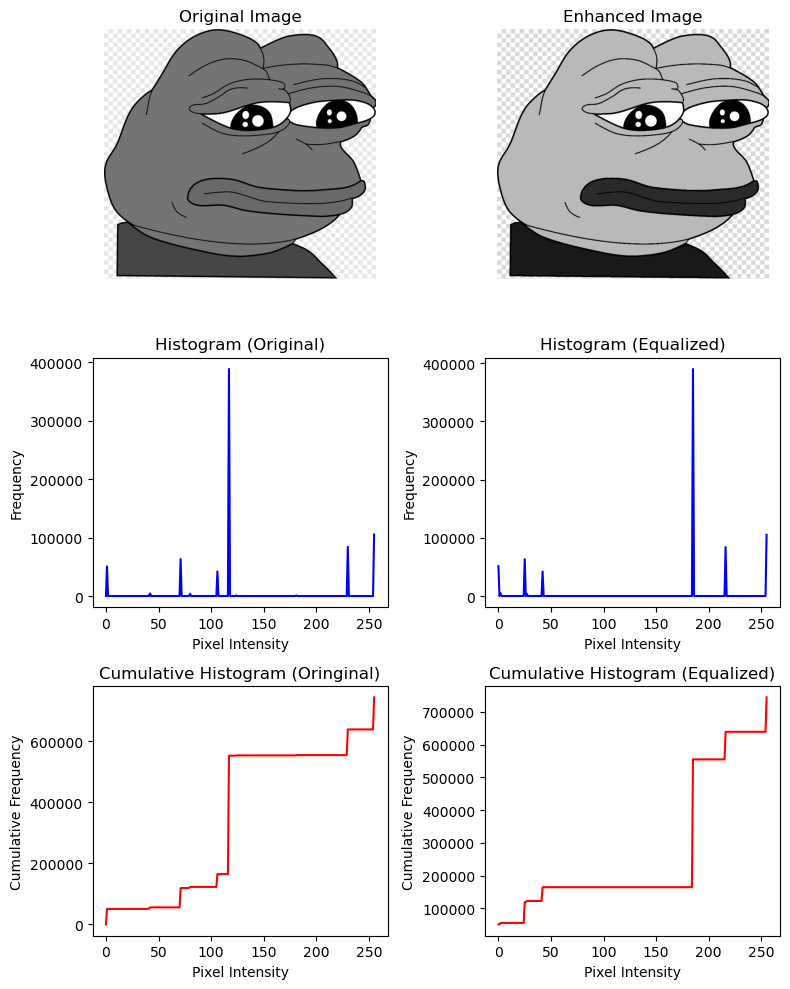

In [10]:
# apply histogram equalization to enhance contrast
equalized_img = cv2.equalizeHist(img_gray)

# calculate histogram
hist_org, _ = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
hist_equalized, _ = np.histogram(equalized_img.flatten(), bins=256, range=[0, 256])

# calculate cumulative histogram
cumul_hist_org = np.cumsum(hist_org)
cumul_hist_equalized = np.cumsum(hist_equalized)

# create subplots to display the images
plt.figure(figsize=(8, 10))

# display the original grayscale image
plt.subplot(3, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# display the noisy grayscale image
plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap="gray")
plt.title("Enhanced Image")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.plot(hist_org, color='blue')
plt.title("Histogram (Original)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
plt.plot(hist_equalized, color='blue')
plt.title("Histogram (Equalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.plot(cumul_hist_org, color='red')
plt.title("Cumulative Histogram (Oringinal)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")

plt.subplot(3, 2, 6)
plt.plot(cumul_hist_equalized, color='red')
plt.title("Cumulative Histogram (Equalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")

# show the plots
plt.tight_layout()
plt.show()